# This files provides all the code to reproduce the Figures 1 (s = 10) of the Experiments and the Figure 2 in the Appendix with parameter s = 100

[<matplotlib.lines.Line2D object at 0x7f89bdb2bdc0>, <matplotlib.lines.Line2D object at 0x7f89be43b430>, <matplotlib.lines.Line2D object at 0x7f89be43ba90>]
5


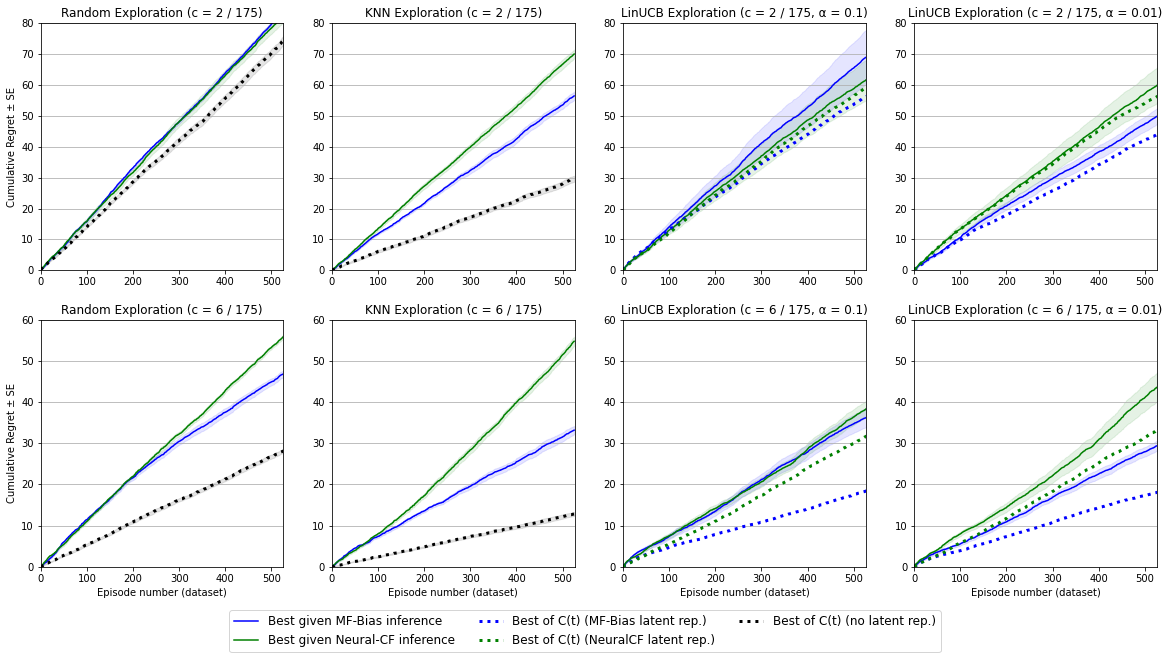

In [11]:
import pandas as pd
import tensorflow as tf
import numpy as np
import random
import os
from sklearn.preprocessing import StandardScaler
import models 
import utils

import pickle as pkl
import gzip
import matplotlib.pyplot as plt

def graphs_rdm(ax, knowledge, ylim,xlim, nb_fold, ylabel, xlabel):

    direc = './results'
    input_dir = os.path.join(direc, 'model-reco-job-0.1.dev34-g8476d2d.d20210308230430')
    
    regret_mf = []
    regret_mfb = []
    regret_neurcf = []
    regret_knn = []
    regret_rdm = []
    
    for fold_id in range(nb_fold):
    
        with gzip.open( os.path.join(input_dir, 'RDM_reward_{}_{}.pkl.gz'.format(fold_id, knowledge) )  ,'rb') as f:
            reward = np.array( pkl.load(f),dtype='object' )
            full_exploration = pkl.load(f)
            full_recommendation = pkl.load(f)
            optimal =  pkl.load(f)
    
        regret_mf.append( np.cumsum(reward[:,5]-reward[:,0]) )
        regret_mfb.append( np.cumsum(reward[:,5]-reward[:,1]) )
        regret_neurcf.append( np.cumsum(reward[:,5]-reward[:,2]) )
        regret_knn.append( np.cumsum(reward[:,5]-reward[:,3]) )
        regret_rdm.append( np.cumsum(reward[:,5]-reward[:,4]) )
        
    regret_mf = np.array(regret_mf, dtype=np.float64)
    regret_mfb = np.array(regret_mfb, dtype=np.float64)
    regret_neurcf = np.array(regret_neurcf, dtype=np.float64)
    regret_knn = np.array(regret_knn, dtype=np.float64)
    regret_rdm = np.array(regret_rdm, dtype=np.float64)
        
    regret = [ np.mean(regret_mf, axis = 0), np.mean(regret_mfb, axis = 0), np.mean(regret_neurcf, axis = 0), np.mean(regret_knn, axis = 0), np.mean(regret_rdm, axis = 0)  ]
  
    a = 0.1
    ax.plot( range( len(regret[1]) ), regret[1], label = 'mf+bias',  color='blue' )
    ax.fill_between(range(len(regret[1])), regret[1] -  np.std(regret_mfb, axis=0) / np.sqrt(nb_fold), regret[1] +  np.std(regret_mfb, axis=0) / np.sqrt(nb_fold), alpha=a, color = 'blue') 
    ax.plot( range( len(regret[2]) ), regret[2], label = 'neur-cf', color = 'green' )
    ax.fill_between(range(len(regret[2])), regret[2] -  np.std(regret_neurcf, axis=0) / np.sqrt(nb_fold), regret[2]+  np.std(regret_neurcf, axis=0) / np.sqrt(nb_fold), alpha=a, color = 'green') 
    ax.plot( range( len(regret[4]) ), regret[4], label = 'random '.format(knowledge), linewidth=3.0, color='black', linestyle = 'dotted' )
    ax.fill_between(range(len(regret[4])), regret[4] -  np.std(regret_rdm, axis=0) / np.sqrt(nb_fold), regret[4] +  np.std(regret_rdm, axis=0) / np.sqrt(nb_fold), alpha=a, color = 'black') 
 
    ax.grid(axis='y')
    ax.set_ylim(0,ylim)
    ax.set_xlim(0,xlim)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title('Random Exploration (c = {} / 175)'.format(knowledge))

    return ax


     
def graphs_linucb(ax, knowledge, alpha, step_size, ylim,xlim, nb_fold, ylabel, xlabel):
    
    direc = './results'

    if alpha == 0.1 and step_size == 10:
        input_dir = os.path.join(direc, 'model-reco-job-0.1.dev34-g8476d2d.d20210310214347')
    elif alpha == 0.01 and step_size == 10:
        input_dir = os.path.join(direc, 'model-reco-job-0.1.dev34-g8476d2d.d20210310214413')

    regret_mf = []
    regret_mfb = []
    regret_neurcf = []
    regret_knn = []
    regret_ucb1 = []
    regret_ucb2 = []
    regret_ucb3 = []
    regret_rdm = []
    
    for fold_id in range(nb_fold):

        with gzip.open( os.path.join(input_dir, 'LINUCB_reward_{}_{}.pkl.gz'.format(fold_id, knowledge) )  ,'rb') as f:
            reward = np.array( pkl.load(f),dtype='object' )
            full_exploration = pkl.load(f)
            full_recommendation = pkl.load(f)
            optimal =  pkl.load(f)
            
        if len(reward)<666:
            print(len(reward))
    
        regret_mf.append( np.cumsum(reward[:,8]-reward[:,0]) )
        regret_mfb.append( np.cumsum(reward[:,8]-reward[:,1]) )
        regret_neurcf.append( np.cumsum(reward[:,8]-reward[:,2]) )
        regret_knn.append( np.cumsum(reward[:,8]-reward[:,3]) )
        regret_rdm.append( np.cumsum(reward[:,8]-reward[:,4]) )
        regret_ucb1.append( np.cumsum(reward[:,8]-reward[:,5]) )
        regret_ucb2.append( np.cumsum(reward[:,8]-reward[:,6]) )
        regret_ucb3.append( np.cumsum(reward[:,8]-reward[:,7]) )
        
    regret_mf = np.array(regret_mf, dtype=np.float64)
    regret_mfb = np.array(regret_mfb, dtype=np.float64)
    regret_neurcf = np.array(regret_neurcf, dtype=np.float64)
    regret_knn = np.array(regret_knn, dtype=np.float64)
    regret_rdm = np.array(regret_rdm, dtype=np.float64)
    regret_ucb1 = np.array(regret_ucb1, dtype=np.float64)
    regret_ucb2 = np.array(regret_ucb2, dtype=np.float64)
    regret_ucb3 = np.array(regret_ucb3, dtype=np.float64)
    
    regret = [ np.mean(regret_mf, axis = 0), np.mean(regret_mfb, axis = 0), np.mean(regret_neurcf, axis = 0), np.mean(regret_knn, axis = 0) ]
    baseline = [ np.mean(regret_rdm, axis = 0), np.mean(regret_ucb1, axis = 0), np.mean(regret_ucb2, axis = 0), np.mean(regret_ucb3, axis = 0)  ]
    
    a = 0.1
    ax.plot( range( len(regret[1]) ), regret[1], label = 'bias MF',  color='blue' )
    ax.fill_between(range(len(regret[1])), regret[1] -  np.std(regret_mfb, axis=0) / np.sqrt(nb_fold), regret[1] +  np.std(regret_mfb, axis=0) / np.sqrt(nb_fold), alpha=a, color = 'blue') 
    ax.plot( range( len(regret[2]) ), regret[2], label = 'neural MF', color = 'green' )
    ax.fill_between(range(len(regret[2])), regret[2] -  np.std(regret_neurcf, axis=0) / np.sqrt(nb_fold), regret[2]+  np.std(regret_neurcf, axis=0) / np.sqrt(nb_fold), alpha=a, color = 'green') 
    ax.plot( range( len(baseline[2]) ), baseline[2], label = 'UCB mf+bias', linewidth=3.0, color='blue', linestyle = 'dotted' )
    ax.plot( range( len(baseline[3]) ), baseline[3], label = 'UCB neur CF', linewidth=3.0, color='green', linestyle = 'dotted' )

    ax.grid(axis='y')
    ax.set_ylim(0,ylim)
    ax.set_xlim(0,xlim)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title('LinUCB Exploration (c = {} / 175, α = {})'.format(knowledge, alpha))
    

    return ax


def graphs_distance(ax, knowledge, ylim, xlim, nb_fold, ylabel, xlabel):

    direc = './results'
    
    if knowledge == 6:
        input_dir = os.path.join(direc, 'model-reco-job-0.1.dev34-g8476d2d.d20210510185017')
    
    elif knowledge == 2:
        input_dir = os.path.join(direc, 'model-reco-job-0.1.dev34-g8476d2d.d20210510184720')
    
    regret_mf = []
    regret_mfb = []
    regret_neurcf = []
    regret_knn = []
    regret_rdm = []
    regret_rd = []
    
    for fold_id in range(nb_fold):
    
        with gzip.open( os.path.join(input_dir, 'DIST_reward_{}_{}.pkl.gz'.format(fold_id, knowledge) )  ,'rb') as f:
            reward = np.array( pkl.load(f),dtype=object )
            full_exploration = pkl.load(f)
            full_recommendation = pkl.load(f)
            optimal =  pkl.load(f)
            rdm_exploration = pkl.load(f)
        
        regret_mfb.append( np.cumsum(reward[:,4]-reward[:,0]) )
        regret_neurcf.append( np.cumsum(reward[:,4]-reward[:,1]) )
        regret_rdm.append( np.cumsum(reward[:,4]-reward[:,2]) )
        regret_rd.append( np.cumsum(reward[:,4]-reward[:,3]) )
        
    regret_mfb = np.array(regret_mfb, dtype=np.float64)
    regret_neurcf = np.array(regret_neurcf, dtype=np.float64)
    regret_rdm = np.array(regret_rdm, dtype=np.float64)
    regret_rd = np.array(regret_rd, dtype=np.float64)
        
    regret = [  np.mean(regret_mfb, axis = 0), np.mean(regret_neurcf, axis = 0), np.mean(regret_rdm, axis = 0), np.mean(regret_rd, axis = 0)  ]
  
    a = 0.1
    ax.plot( range( len(regret[0]) ), regret[0], label = 'mf+bias',  color='blue' )
    ax.fill_between(range(len(regret[0])), regret[0] -  np.std(regret_mfb, axis=0) / np.sqrt(nb_fold), regret[0] +  np.std(regret_mfb, axis=0) / np.sqrt(nb_fold), alpha=a, color = 'blue') 
    
    ax.plot( range( len(regret[1]) ), regret[1], label = 'neur-cf', color = 'green' )
    ax.fill_between(range(len(regret[1])), regret[1] -  np.std(regret_neurcf, axis=0) / np.sqrt(nb_fold), regret[1]+  np.std(regret_neurcf, axis=0) / np.sqrt(nb_fold), alpha=a, color = 'green') 

    ax.plot( range( len(regret[2]) ), regret[2], label = 'greedy '.format(knowledge), linewidth=3.0, color='black', linestyle = 'dotted' )
    ax.fill_between(range(len(regret[2])), regret[2] -  np.std(regret_rdm, axis=0) / np.sqrt(nb_fold), regret[2] +  np.std(regret_rdm, axis=0) / np.sqrt(nb_fold), alpha=a, color = 'black')

    ax.grid(axis='y')
    ax.set_ylim(0,ylim)
    ax.set_xlim(0,xlim)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title('KNN Exploration (c = {} / 175)'.format(knowledge))

    return ax


def plot_linucb(nb_fold, xlim, ylim1,ylim2,ylim3, step_size, name):

    fig, (row1, row3) = plt.subplots(nrows=2, ncols=4, sharey=False, figsize=(20,10))
    
    row1[0] = graphs_rdm(row1[0], 2,  ylim1, xlim, nb_fold, 'Cumulative Regret ± SE','')
    row1[1] = graphs_distance(row1[1], 2,  ylim1, xlim, nb_fold, '','')
    row1[2] = graphs_linucb(row1[2], 2, 0.1, step_size, ylim1, xlim, nb_fold, '','')
    row1[3] = graphs_linucb(row1[3], 2, 0.01, step_size, ylim1, xlim, nb_fold, '','')

    row3[0] = graphs_rdm(row3[0], 6,  ylim3, xlim, nb_fold, 'Cumulative Regret ± SE','Episode number (dataset)')
    row3[1] = graphs_distance(row3[1], 6,  ylim3, xlim, nb_fold, '','Episode number (dataset)')
    row3[2] = graphs_linucb(row3[2], 6, 0.1, step_size, ylim3, xlim, nb_fold, '','Episode number (dataset)')
    row3[3] = graphs_linucb(row3[3], 6, 0.01, step_size, ylim3, xlim, nb_fold, '','Episode number (dataset)')

    final_lines = [ row1[0].lines[0], row1[0].lines[1], row1[2].lines[2], row1[2].lines[3], row1[0].lines[2] ] 
    print(row1[0].lines)
    print(len(final_lines))
    fig.legend( final_lines, ['Best given MF-Bias inference', 'Best given Neural-CF inference',  'Best of C(t) (MF-Bias latent rep.)', 'Best of C(t) (NeuralCF latent rep.)', 'Best of C(t) (no latent rep.)'], prop={'size': 12}, loc = 8, ncol = 3)

    plt.savefig("./{}.pdf".format(name), bbox_inches='tight')
    
    return fig

fig = plot_linucb(10, 526, 80, 60, 60, 10, 'regret')

[<matplotlib.lines.Line2D object at 0x7f89bd4c8fd0>, <matplotlib.lines.Line2D object at 0x7f89bd4704c0>, <matplotlib.lines.Line2D object at 0x7f89bd470a90>]
5


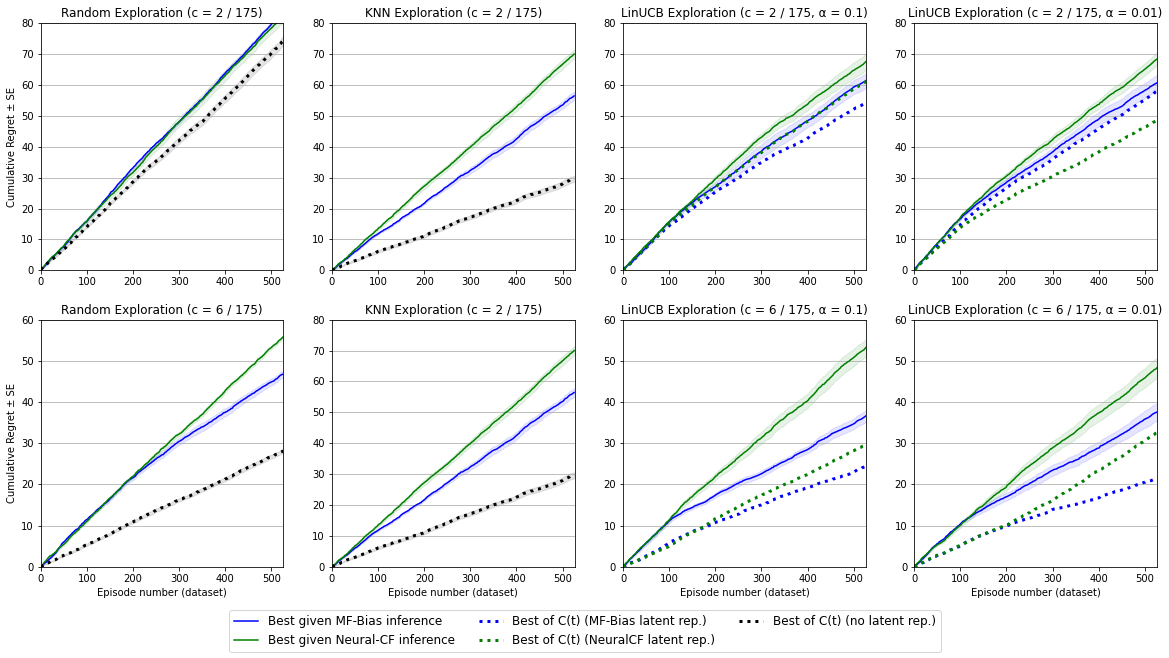

In [8]:
##### this cell is to reproduce Figure 2 in APpendix with update step = 100
#### we must redefine the functions because there are some saved format changes

def graphs_rdm(ax, knowledge, ylim,xlim, nb_fold, ylabel, xlabel):
    
    #### load the results associated to the random exploration policy

    direc = './results'
    input_dir = os.path.join(direc, 'model-reco-job-0.1.dev34-g8476d2d.d20210308230430')
    
    regret_mf = []
    regret_mfb = []
    regret_neurcf = []
    regret_knn = []
    regret_rdm = []
    
    for fold_id in range(nb_fold):
    
        with gzip.open( os.path.join(input_dir, 'RDM_reward_{}_{}.pkl.gz'.format(fold_id, knowledge) )  ,'rb') as f:
            reward = np.array( pkl.load(f),dtype='object' )
            full_exploration = pkl.load(f)
            full_recommendation = pkl.load(f)
            optimal =  pkl.load(f)
    
        regret_mf.append( np.cumsum(reward[:,5]-reward[:,0]) )
        regret_mfb.append( np.cumsum(reward[:,5]-reward[:,1]) )
        regret_neurcf.append( np.cumsum(reward[:,5]-reward[:,2]) )
        regret_knn.append( np.cumsum(reward[:,5]-reward[:,3]) )
        regret_rdm.append( np.cumsum(reward[:,5]-reward[:,4]) )
        
    regret_mf = np.array(regret_mf, dtype=np.float64)
    regret_mfb = np.array(regret_mfb, dtype=np.float64)
    regret_neurcf = np.array(regret_neurcf, dtype=np.float64)
    regret_knn = np.array(regret_knn, dtype=np.float64)
    regret_rdm = np.array(regret_rdm, dtype=np.float64)
        
    regret = [ np.mean(regret_mf, axis = 0), np.mean(regret_mfb, axis = 0), np.mean(regret_neurcf, axis = 0), np.mean(regret_knn, axis = 0), np.mean(regret_rdm, axis = 0)  ]
  
    a = 0.1
    ax.plot( range( len(regret[1]) ), regret[1], label = 'mf+bias',  color='blue' )
    ax.fill_between(range(len(regret[1])), regret[1] -  np.std(regret_mfb, axis=0) / np.sqrt(nb_fold), regret[1] +  np.std(regret_mfb, axis=0) / np.sqrt(nb_fold), alpha=a, color = 'blue') 
    ax.plot( range( len(regret[2]) ), regret[2], label = 'neur-cf', color = 'green' )
    ax.fill_between(range(len(regret[2])), regret[2] -  np.std(regret_neurcf, axis=0) / np.sqrt(nb_fold), regret[2]+  np.std(regret_neurcf, axis=0) / np.sqrt(nb_fold), alpha=a, color = 'green') 
    ax.plot( range( len(regret[4]) ), regret[4], label = 'random '.format(knowledge), linewidth=3.0, color='black', linestyle = 'dotted' )
    ax.fill_between(range(len(regret[4])), regret[4] -  np.std(regret_rdm, axis=0) / np.sqrt(nb_fold), regret[4] +  np.std(regret_rdm, axis=0) / np.sqrt(nb_fold), alpha=a, color = 'black') 
 
    ax.grid(axis='y')
    ax.set_ylim(0,ylim)
    ax.set_xlim(0,xlim)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title('Random Exploration (c = {} / 175)'.format(knowledge))

    return ax


     
def graphs_linucb(ax, knowledge, alpha, step_size, ylim,xlim, nb_fold, ylabel, xlabel):
    
    ### load the results associated to the LinUCB exploration policy
    
    direc = './results'

    if alpha == 0.1 and step_size == 100:
        input_dir = os.path.join(direc,'model-reco-job-0.1.dev34-g8476d2d.d20210518191252')
    elif alpha == 0.01 and step_size == 100:
        input_dir = os.path.join(direc,'model-reco-job-0.1.dev34-g8476d2d.d20210518191410')

    regret_mfb = []
    regret_neurcf = []
    regret_ucb2 = []
    regret_ucb3 = []
    
    for fold_id in range(nb_fold):

        with gzip.open( os.path.join(input_dir, 'LINUCB_reward_{}_{}.pkl.gz'.format(fold_id, knowledge) )  ,'rb') as f:
            reward = np.array( pkl.load(f),dtype='object' )
            full_exploration = pkl.load(f)
            full_recommendation = pkl.load(f)
            optimal =  pkl.load(f)
            
        if len(reward)<666:
            print(len(reward))

        regret_mfb.append( np.cumsum(reward[:,4]-reward[:,0]) )
        regret_neurcf.append( np.cumsum(reward[:,4]-reward[:,1]) )
        regret_ucb2.append( np.cumsum(reward[:,4]-reward[:,2]) )
        regret_ucb3.append( np.cumsum(reward[:,4]-reward[:,3]) )
            
    regret_mfb = np.array(regret_mfb, dtype=np.float64)
    regret_neurcf = np.array(regret_neurcf, dtype=np.float64)
    regret_ucb2 = np.array(regret_ucb2, dtype=np.float64)
    regret_ucb3 = np.array(regret_ucb3, dtype=np.float64)
        
    regret = [ np.mean(regret_mfb, axis = 0), np.mean(regret_neurcf, axis = 0) ]
    baseline = [ np.mean(regret_ucb2, axis = 0), np.mean(regret_ucb3, axis = 0)  ]

    a = 0.1
    ax.plot( range( len(regret[0]) ), regret[0], label = 'bias MF',  color='blue' )
    ax.fill_between(range(len(regret[0])), regret[0] -  np.std(regret_mfb, axis=0) / np.sqrt(nb_fold), regret[0] +  np.std(regret_mfb, axis=0) / np.sqrt(nb_fold), alpha=a, color = 'blue') 
    ax.plot( range( len(regret[1]) ), regret[1], label = 'neural MF', color = 'green' )
    ax.fill_between(range(len(regret[1])), regret[1] -  np.std(regret_neurcf, axis=0) / np.sqrt(nb_fold), regret[1]+  np.std(regret_neurcf, axis=0) / np.sqrt(nb_fold), alpha=a, color = 'green') 
    ax.plot( range( len(baseline[0]) ), baseline[0], label = 'UCB mf+bias', linewidth=3.0, color='blue', linestyle = 'dotted' )
    ax.plot( range( len(baseline[1]) ), baseline[1], label = 'UCB neur CF', linewidth=3.0, color='green', linestyle = 'dotted' )
    ax.grid(axis='y')

    ax.set_ylim(0,ylim)
    ax.set_xlim(0,xlim)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title('LinUCB Exploration (c = {} / 175, α = {})'.format(knowledge, alpha))
    
    return ax


def graphs_distance(ax, knowledge, ylim, xlim, nb_fold, ylabel, xlabel):
    
    ### load the results associated to the KNN exploration policy

    direc = './results'
    
    if knowledge == 6:
        input_dir = os.path.join(direc, 'model-reco-job-0.1.dev34-g8476d2d.d20210510185017')
    
    elif knowledge == 2:
        input_dir = os.path.join(direc, 'model-reco-job-0.1.dev34-g8476d2d.d20210510184720')
    
    regret_mf = []
    regret_mfb = []
    regret_neurcf = []
    regret_knn = []
    regret_rdm = []
    regret_rd = []
    
    for fold_id in range(nb_fold):
    
        with gzip.open( os.path.join(input_dir, 'DIST_reward_{}_{}.pkl.gz'.format(fold_id, knowledge) )  ,'rb') as f:
            reward = np.array( pkl.load(f),dtype=object )
            full_exploration = pkl.load(f)
            full_recommendation = pkl.load(f)
            optimal =  pkl.load(f)
            rdm_exploration = pkl.load(f)
        
        regret_mfb.append( np.cumsum(reward[:,4]-reward[:,0]) )
        regret_neurcf.append( np.cumsum(reward[:,4]-reward[:,1]) )
        regret_rdm.append( np.cumsum(reward[:,4]-reward[:,2]) )
        regret_rd.append( np.cumsum(reward[:,4]-reward[:,3]) )
        
    regret_mfb = np.array(regret_mfb, dtype=np.float64)
    regret_neurcf = np.array(regret_neurcf, dtype=np.float64)
    regret_rdm = np.array(regret_rdm, dtype=np.float64)
    regret_rd = np.array(regret_rd, dtype=np.float64)
        
    regret = [  np.mean(regret_mfb, axis = 0), np.mean(regret_neurcf, axis = 0), np.mean(regret_rdm, axis = 0), np.mean(regret_rd, axis = 0)  ]
  
    a = 0.1
    ax.plot( range( len(regret[0]) ), regret[0], label = 'mf+bias',  color='blue' )
    ax.fill_between(range(len(regret[0])), regret[0] -  np.std(regret_mfb, axis=0) / np.sqrt(nb_fold), regret[0] +  np.std(regret_mfb, axis=0) / np.sqrt(nb_fold), alpha=a, color = 'blue') 
    
    ax.plot( range( len(regret[1]) ), regret[1], label = 'neur-cf', color = 'green' )
    ax.fill_between(range(len(regret[1])), regret[1] -  np.std(regret_neurcf, axis=0) / np.sqrt(nb_fold), regret[1]+  np.std(regret_neurcf, axis=0) / np.sqrt(nb_fold), alpha=a, color = 'green') 

    ax.plot( range( len(regret[2]) ), regret[2], label = 'greedy '.format(knowledge), linewidth=3.0, color='black', linestyle = 'dotted' )
    ax.fill_between(range(len(regret[2])), regret[2] -  np.std(regret_rdm, axis=0) / np.sqrt(nb_fold), regret[2] +  np.std(regret_rdm, axis=0) / np.sqrt(nb_fold), alpha=a, color = 'black')

    ax.grid(axis='y')
    ax.set_ylim(0,ylim)
    ax.set_xlim(0,xlim)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title('KNN Exploration (c = {} / 175)'.format(knowledge))

    return ax


def plot_linucb(nb_fold, xlim, ylim1,ylim2,ylim3, step_size, name):

    fig, (row1, row3) = plt.subplots(nrows=2, ncols=4, sharey=False, figsize=(20,10))
    
    row1[0] = graphs_rdm(row1[0], 2,  ylim1, xlim, nb_fold, 'Cumulative Regret ± SE','')
    row1[1] = graphs_distance(row1[1], 2,  ylim1, xlim, nb_fold, '','')
    row1[2] = graphs_linucb(row1[2], 2, 0.1, step_size, ylim1, xlim, nb_fold, '','')
    row1[3] = graphs_linucb(row1[3], 2, 0.01, step_size, ylim1, xlim, nb_fold, '','')

    row3[0] = graphs_rdm(row3[0], 6,  ylim3, xlim, nb_fold, 'Cumulative Regret ± SE','Episode number (dataset)')
    row3[1] = graphs_distance(row3[1], 2,  ylim1, xlim, nb_fold, '','Episode number (dataset)')
    row3[2] = graphs_linucb(row3[2], 6, 0.1, step_size, ylim3, xlim, nb_fold, '','Episode number (dataset)')
    row3[3] = graphs_linucb(row3[3], 6, 0.01, step_size, ylim3, xlim, nb_fold, '','Episode number (dataset)')

    final_lines = [ row1[0].lines[0], row1[0].lines[1], row1[2].lines[2], row1[2].lines[3], row1[0].lines[2] ] 
    print(row1[0].lines)
    print(len(final_lines))
    fig.legend( final_lines, ['Best given MF-Bias inference', 'Best given Neural-CF inference',  'Best of C(t) (MF-Bias latent rep.)', 'Best of C(t) (NeuralCF latent rep.)', 'Best of C(t) (no latent rep.)'], prop={'size': 12}, loc = 8, ncol = 3)

    plt.savefig("./{}.pdf".format(name), bbox_inches='tight')
    
    return fig

fig = plot_linucb(10, 526, 80, 60, 60, 100, 'regret100')